### **Dataviz Python makeover**
# When Europeans fly nest

*References*
- mkladv
- 

<img src="../pics/europeans_parental_household.png" style="height: 500px;"/>

## 0. Import libraries
We begin by setting up the coding environment.

In [84]:
# Libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns

In [3]:
# Chart style configuration

# sns.set_style("ticks")
sns.reset_orig() # restore all RC params to original settings (respects custom rc)
plt.rcParams["font.family"] = "Arial"
%config InlineBackend.figure_format = 'svg'

## 1. Import data
We create the dataset from scratch given the values in the image.

In [4]:
data = [
    ['Finland', 21.3, 'below 23'],
    ['Estonia', 22.7, 'below 23'],
    ['Sweden', 21.4, 'below 23'],
    ['Denmark', 21.7, 'below 23'],
    ['Netherlands', 23, '23-25'],
    ['Germany', 23.8, '23-25'],
    ['Lithuania', 24.7, '23-25'],
    ['France', 23.4, '23-25'],
    ['Belgium', 26.3, '25-27'],
    ['Ireland', 26.9, '25-27'],
    ['Luxembourg', 26.8, '25-27'],
    ['Latvia', 26.8, '25-27'],
    ['Austria', 25.3, '25-27'],
    ['Czechia', 25.9, '25-27'],
    ['Poland', 28.9, '27-29'],
    ['Hungary', 27.1, '27-29'],
    ['Cyprus', 27.5, '27-29'],
    ['Romania', 27.7, '27-29'],
    ['Slovenia', 29.4, '29-31'],
    ['Greece', 30.7, '29-31'],
    ['Malta', 30.1, '29-31'],
    ['Portugal', 29.7, '29-31'],
    ['Spain', 30.3, '29-31'],
    ['Italy', 30.0, '29-31'],
    ['Bulgaria', 30.3, '29-31'],
    ['Slovakia', 30.8, '29-31'],
    ['Croatia', 33.4, 'over 31'],
]

In [5]:
df = pd.DataFrame(data=data, columns=['country', 'avg_age_22', 'age_cluster']).sort_values(by='avg_age_22')
df.head()

,country,avg_age_22,age_cluster
0,Finland,21.3,below 23
2,Sweden,21.4,below 23
3,Denmark,21.7,below 23
1,Estonia,22.7,below 23
4,Netherlands,23.0,23-25


In [6]:
df.shape

(27, 3)

## 2. Barplot

In [72]:
# We need dedicated colors for different age clusters.
df.age_cluster.unique()

array(['below 23', '23-25', '25-27', '27-29', '29-31', 'over 31'],
      dtype=object)

In [91]:
# Rather than the color palette used in the chart, we opt for this one:
palette = sns.color_palette("rocket", n_colors=df.age_cluster.nunique())
palette
# (for more color palette: https://www.practicalpythonfordatascience.com/ap_seaborn_palette).

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

In [96]:
# Get hex codes:
hex_colors = [mcolors.to_hex(color) for color in palette]
hex_colors = hex_colors[::-1]

In [97]:
# Add a col to the df:
dict_age_color = dict(zip(df.age_cluster.unique(), hex_colors))
df['color'] = df.age_cluster.map(dict_age_color)

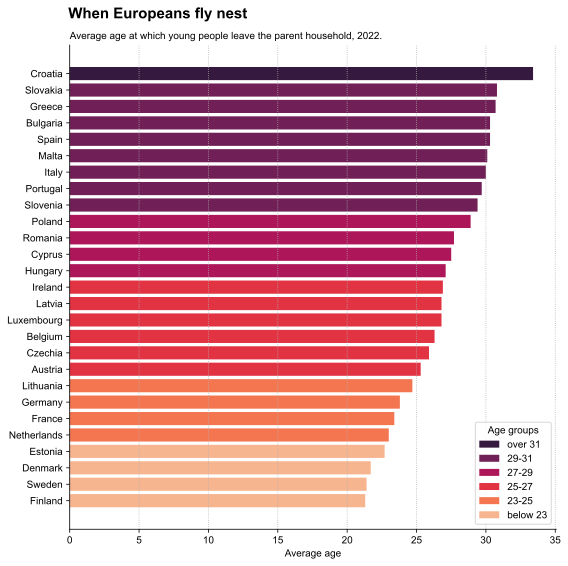

In [134]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Horizontal bar chart
ax.barh(y=range(len(df)), width=df.avg_age_22, color=df.color, label=df.age_cluster)

# Update labels on the y-axis
ax.set_yticks(range(len(df)), labels=df.country, fontsize=10)

# Axis labelling
ax.set_xlabel('Average age')

# Hide axis and ticks on the top and right side
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Enable and customize the x-axis grid
ax.xaxis.grid(True, linestyle=':')

# Set title & fig-level subtitle
# Mid point of left and right x-positions
fig.suptitle('When Europeans fly nest', fontsize=15, fontweight='bold', x=0.125, y=0.98, horizontalalignment='left', verticalalignment='top')
ax.set_title('Average age at which young people leave the parent household, 2022.', fontsize=10, loc='left')

# Legend
handles, labels = plt.gca().get_legend_handles_labels()
handles, labels = handles[::-1], labels[::-1]
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Age groups')

fig.tight_layout()
plt.show()